In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
files = [
    "chile_2000_2005.csv",
    "chile_2005_2010.csv",
    "chile_2010_2015.csv",
    "chile_2015_2020.csv",
    "chile_2020_2025.csv"
]

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

In [5]:
df['type'].value_counts()


type
earthquake    36139
Name: count, dtype: int64

In [6]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
11441,2000-01-01 04:30:10.370000+00:00,-26.012,-68.803,105.0,4.5,mb,NaN,NaN,NaN,0.91,...,2014-11-07T01:09:14.812Z,"130 km ENE of Diego de Almagro, Chile",earthquake,NaN,NaN,NaN,15.0,reviewed,us,us
11440,2000-01-01 16:01:13.500000+00:00,-22.214,-70.191,67.2,4.4,mb,NaN,NaN,NaN,0.83,...,2014-11-07T01:09:15.804Z,"13 km S of Tocopilla, Chile",earthquake,NaN,14.1,NaN,4.0,reviewed,us,us
11439,2000-01-02 02:13:28.920000+00:00,-17.346,-69.277,161.6,3.7,mb,NaN,NaN,NaN,1.13,...,2014-11-07T01:09:15.988Z,"81 km E of Tarata, Peru",earthquake,NaN,11.4,NaN,2.0,reviewed,us,us
11438,2000-01-03 04:03:14.990000+00:00,-21.110,-68.424,134.4,4.0,mb,NaN,NaN,NaN,1.13,...,2014-11-07T01:09:16.772Z,"157 km NNE of Calama, Chile",earthquake,NaN,16.0,NaN,4.0,reviewed,us,us
11437,2000-01-06 21:37:49.760000+00:00,-18.334,-69.446,143.2,4.6,mb,NaN,NaN,NaN,0.73,...,2014-11-07T01:09:18.065Z,"Tarapaca, Chile",earthquake,NaN,8.8,NaN,7.0,reviewed,us,us


In [7]:
df.shape

(36139, 22)

In [8]:
df.dtypes

time               datetime64[ns, UTC]
latitude                       float64
longitude                      float64
depth                          float64
mag                            float64
magType                         object
nst                            float64
gap                            float64
dmin                           float64
rms                            float64
net                             object
id                              object
updated                         object
place                           object
type                            object
horizontalError                float64
depthError                     float64
magError                       float64
magNst                         float64
status                          object
locationSource                  object
magSource                       object
dtype: object

In [9]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                 9684
gap                 7648
dmin               25605
rms                17381
net                    0
id                     0
updated                0
place                  4
type                   0
horizontalError    25925
depthError         20543
magError           25699
magNst             18441
status                 0
locationSource         0
magSource              0
dtype: int64

In [10]:
cols_keep = [
    'time',
    'latitude',
    'longitude',
    'depth',
    'mag',
    'magType',
    'type'
]

df = df[cols_keep].copy()

In [11]:
df.isnull().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
magType      0
type         0
dtype: int64

In [12]:
df['type'].value_counts()


type
earthquake    36139
Name: count, dtype: int64

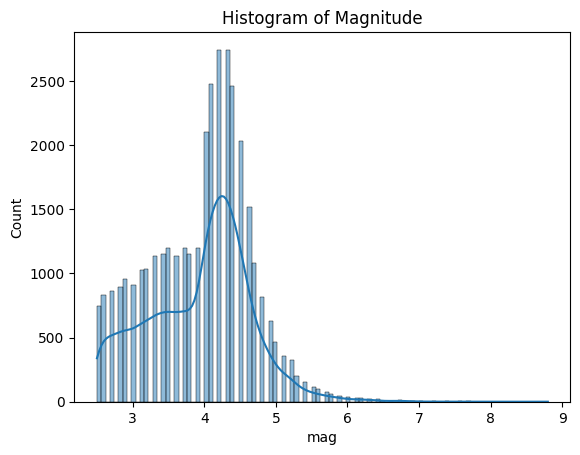

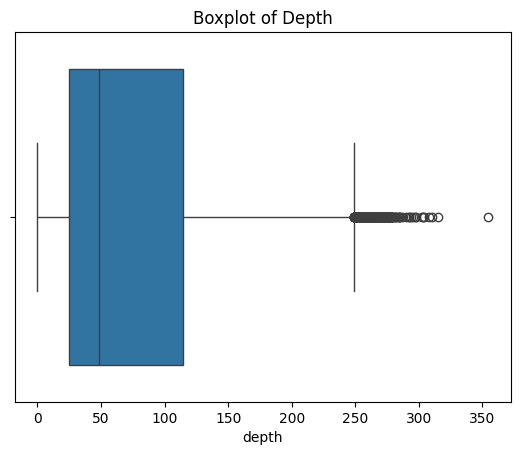

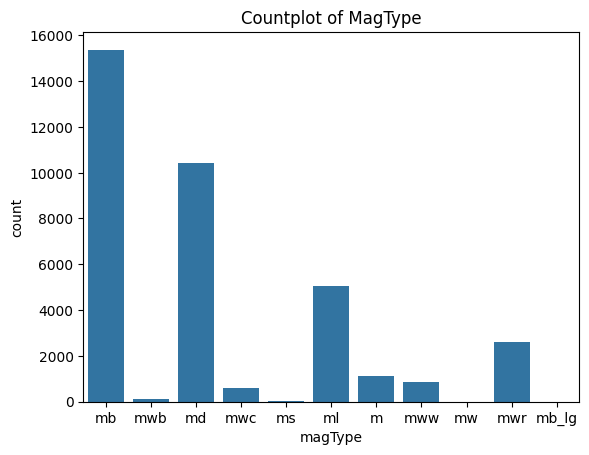

In [13]:
sns.histplot(data=df, x='mag', kde=True)
plt.title('Histogram of Magnitude')
plt.show()

sns.boxplot(data=df, x='depth')
plt.title('Boxplot of Depth')
plt.show()

sns.countplot(data=df, x='magType')
plt.title('Countplot of MagType')
plt.show()

In [14]:
df['magType'].value_counts(normalize=True)


magType
mb       0.425468
md       0.287916
ml       0.139766
mwr      0.071751
m        0.030521
mww      0.023825
mwc      0.016824
mwb      0.003680
ms       0.000138
mw       0.000083
mb_lg    0.000028
Name: proportion, dtype: float64

In [15]:
df.isnull().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
magType      0
type         0
dtype: int64

In [16]:
df.dtypes

time         datetime64[ns, UTC]
latitude                 float64
longitude                float64
depth                    float64
mag                      float64
magType                   object
type                      object
dtype: object

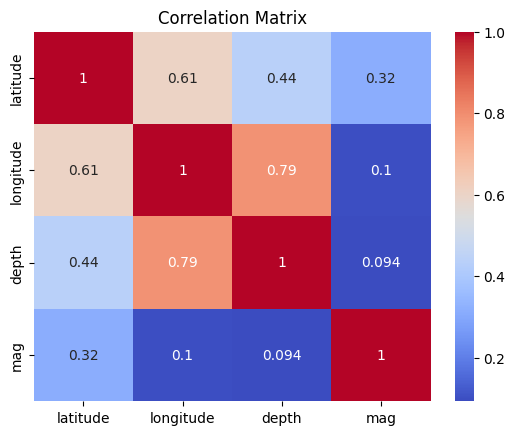

In [17]:
numeric_cols = ['latitude', 'longitude', 'depth', 'mag']

corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Statistical Analysis to test hypothesis.

Hypothesis:

Null Hypothesis (H0): There is no statistically significant relationship between earthquake magnitude, its depth, spatial location, and the time elapsed since the previous earthquake.

Alternative Hypothesis (H1): There exists a statistically significant relationship between earthquake magnitude and at least one of the following variables: depth, spatial location, or the time elapsed since the previous earthquake.

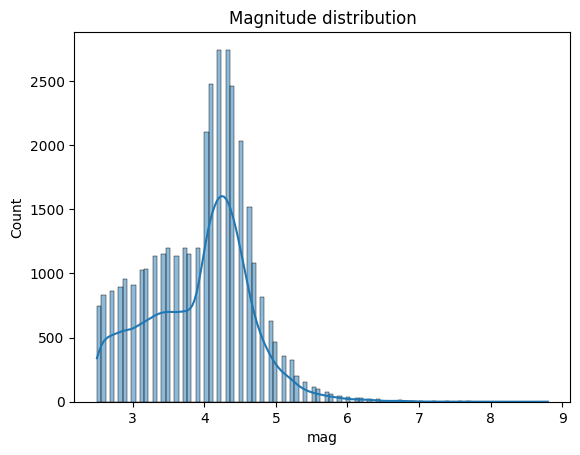

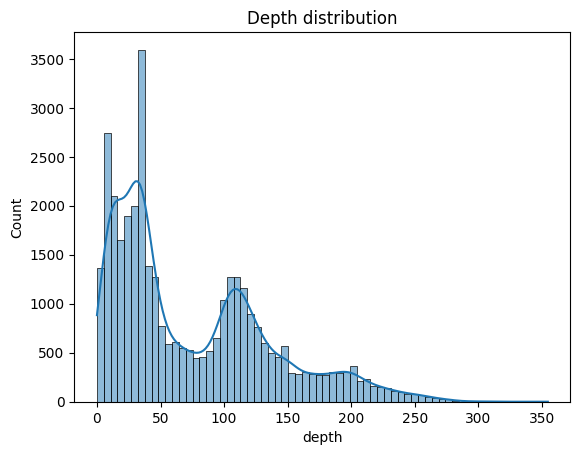

In [18]:
sns.histplot(data=df, x='mag', kde=True)
plt.title('Magnitude distribution')
plt.show()

sns.histplot(data=df, x='depth', kde=True)
plt.title('Depth distribution')
plt.show()



The distributions of magnitude and depth are non-normal and skewed, therefore non-parametric statistical tests were applied.

H0a: Earthquake magnitude is independent of earthquake depth.

In [19]:
from scipy.stats import spearmanr

rho, p = spearmanr(df['mag'], df['depth'])
print(f"Spearman rho = {rho:.3f}, p-value = {p:.5f}")


Spearman rho = 0.088, p-value = 0.00000


Although the relationship between earthquake magnitude and depth was statistically significant, the strength of the correlation was very weak (ρ = 0.088), indicating limited practical significance.

H0b: Earthquake magnitude is independent of spatial location.

In [20]:
df['lat_band'] = pd.cut(
    df['latitude'],
    bins=[-56, -42, -30, -17],
    labels=['South', 'Central', 'North']
)

In [21]:
from scipy.stats import kruskal

groups = [
    df[df['lat_band']=='South']['mag'],
    df[df['lat_band']=='Central']['mag'],
    df[df['lat_band']=='North']['mag']
]

stat, p = kruskal(*groups)

print(f"Kruskal-Wallis H = {stat:.3f}, p-value = {p:.5f}")


Kruskal-Wallis H = 6275.253, p-value = 0.00000


The Kruskal–Wallis test indicated statistically significant differences in earthquake magnitude between spatial regions, suggesting spatial heterogeneity in seismic activity.

H0c: Earthquake magnitude is independent of the time elapsed since the previous earthquake

In [22]:
df = df.sort_values('time').reset_index(drop=True)
df['inter_event_time'] = df['time'].diff().dt.total_seconds()
df = df.dropna(subset=['inter_event_time'])

rho, p = spearmanr(df['mag'], df['inter_event_time'])
print(f"Spearman rho = {rho:.3f}, p-value = {p:.5f}")


Spearman rho = 0.098, p-value = 0.00000


Although a statistically significant correlation was found between earthquake magnitude and inter-event time (ρ = 0.098, p < 0.001), the correlation is very weak, indicating limited practical significance. This suggests that the elapsed time between earthquakes has minimal influence on the magnitude of the subsequent event.

The null hypothesis was rejected, as statistically significant relationships were identified between earthquake magnitude and both depth and spatial location. However, the observed temporal correlation is likely influenced by catalog completeness effects rather than a true physical trend.

ML

In [23]:
df['rolling_mag3'] = df['mag'].rolling(window=3).mean()
df = df.dropna(subset=['inter_event_time', 'rolling_mag3'])

In [24]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'type',
       'lat_band', 'inter_event_time', 'rolling_mag3'],
      dtype='object')

In [25]:
train_size = int(0.8 * len(df))
train = df.iloc[:train_size]
test = df.iloc[train_size:]

features = ['depth', 'latitude', 'longitude', 'inter_event_time', 'rolling_mag3']
target = 'mag'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

In [27]:
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

RMSE: 0.334
MAE: 0.239
R²: 0.266


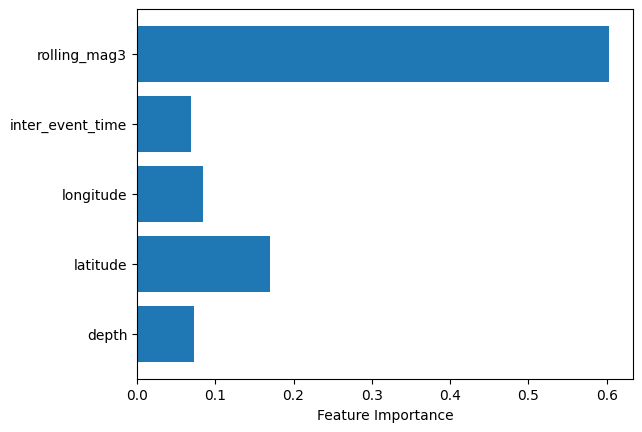

In [28]:
import matplotlib.pyplot as plt

importances = rfr.feature_importances_
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.show()


The Random Forest regression model demonstrated a moderate ability to predict earthquake magnitudes, yielding an RMSE of 0.334 and an MAE of 0.239. While the $R^2$ value of 0.266 indicates that the model captures over a quarter of the target's variance, the results highlight the inherent difficulty of seismic forecasting. The discrepancy between RMSE and MAE suggests that the model is particularly sensitive to outliers, likely corresponding to rare, high-magnitude events that deviate from the average seismic patterns.

Gradient Boosting Regressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

In [30]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print(f"GBR RMSE: {rmse:.3f}")
print(f"GBR MAE: {mae:.3f}")
print(f"GBR R²: {r2:.3f}")


GBR RMSE: 0.316
GBR MAE: 0.226
GBR R²: 0.343


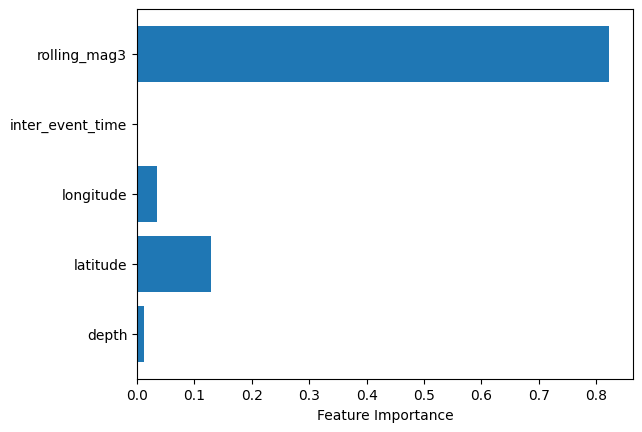

In [31]:
importances = gbr.feature_importances_
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.show()

The Gradient Boosting Regressor (GBR) outperformed the initial Random Forest model across all metrics, achieving a higher $R^2$ of 0.343, and lower error rates (RMSE: 0.316, MAE: 0.226). This improvement suggests that the boosting technique, which iteratively corrects residual errors, is better suited for capturing the non-linear relationships in seismic datasets. Despite this gain, the $R^2$ value remains moderate, confirming that earthquake magnitude exhibits a high degree of irreducible noise.

| Model                       | RMSE   | MAE    | R²     |
| --------------------------- | ------ | ------ | ------ |
| Random Forest Regressor     | 0.334  | 0.239  | 0.266  |
| Gradient Boosting Regressor | 0.316  | 0.226  | 0.343  |


In conclusion, despite the marginal improvements achieved by transitioning from Random Forest to Gradient Boosting, standard regression approaches do not yield highly accurate or reliable results for earthquake magnitude prediction.

Random Forest Classifier

In [32]:
THRESHOLD = 4.5

df['target'] = (df['mag'] >= THRESHOLD).astype(int)

features = [
    'depth',
    'latitude',
    'longitude',
    'inter_event_time',
    'rolling_mag3'
]

X = df[features]
y = df['target']

In [33]:
train_size = int(0.8 * len(df))

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:, 1]


In [35]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.79      0.84      0.81      5028
           1       0.57      0.49      0.53      2200

    accuracy                           0.73      7228
   macro avg       0.68      0.67      0.67      7228
weighted avg       0.72      0.73      0.73      7228

ROC-AUC: 0.7498115552903738


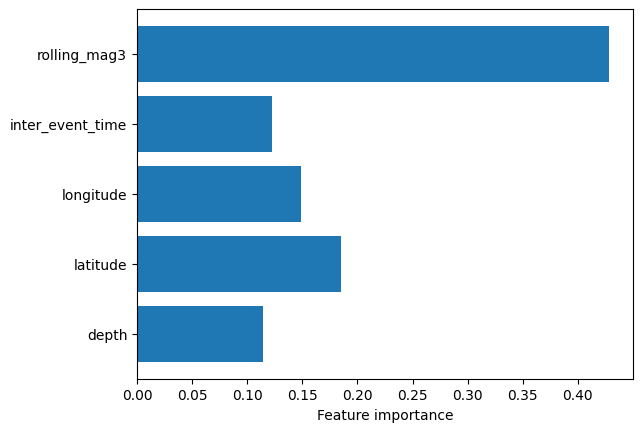

In [36]:
importances = rfc.feature_importances_
plt.barh(features, importances)
plt.xlabel("Feature importance")
plt.show()


Two magnitude thresholds were evaluated. While a threshold of 4.0 resulted in severe class imbalance and trivial classification behavior, a threshold of 4.5 provided a more balanced dataset and more meaningful evaluation of model performance.

The classification model achieved moderate performance in distinguishing higher-magnitude earthquakes (≥4.5), with a ROC-AUC of 0.75. While the model demonstrates reasonable discriminative ability, the reduced recall for the positive class indicates limitations in reliably detecting all stronger seismic events.

XGB Classifier

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])),
    random_state=42
)

xgb.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [38]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


              precision    recall  f1-score   support

           0       0.92      0.32      0.48      5028
           1       0.38      0.94      0.54      2200

    accuracy                           0.51      7228
   macro avg       0.65      0.63      0.51      7228
weighted avg       0.75      0.51      0.50      7228

ROC-AUC: 0.7796674079699139


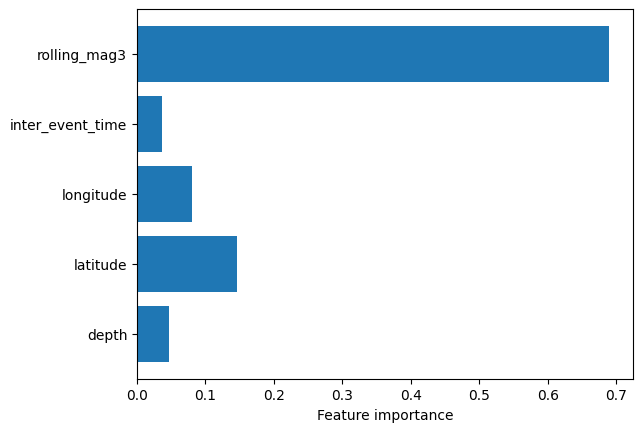

In [39]:
importances = xgb.feature_importances_
plt.barh(features, importances)
plt.xlabel("Feature importance")
plt.show()


For a magnitude threshold of 4.5, the XGBoost classifier achieved a ROC-AUC of 0.78. The model demonstrates strong ability to detect higher-magnitude earthquakes, with recall of 0.94 for class 1, while the precision for this class is lower (0.38), reflecting a trade-off between detecting most strong events and generating false positives. Conversely, smaller earthquakes (class 0) are predicted with high precision (0.92) but low recall (0.32). These results suggest that the classifier can be used effectively to identify potentially significant seismic events, although prediction of all events remains challenging due to the stochastic nature of earthquake occurrence.

| Model         | Class    | Precision | Recall | F1-score | Support | ROC-AUC |
| ------------- | -------- | --------- | ------ | -------- | ------- | ------- |
| Random Forest | 0 (<4.5) | 0.79      | 0.84   | 0.81     | 5028    | 0.75    |
|               | 1 (≥4.5) | 0.57      | 0.49   | 0.53     | 2200    |         |
| XGBoost       | 0 (<4.5) | 0.92      | 0.32   | 0.48     | 5028    | 0.78    |
|               | 1 (≥4.5) | 0.38      | 0.94   | 0.54     | 2200    |         |


The comparison of Random Forest and XGBoost classifiers for predicting higher-magnitude earthquakes (≥4.5) shows that XGBoost slightly outperforms Random Forest in ROC-AUC (0.78 vs. 0.75) and demonstrates a much higher recall for significant events (0.94 vs. 0.49), indicating a better ability to capture potentially hazardous earthquakes. However, this comes at the cost of lower precision for the positive class (0.38 vs. 0.57), meaning more false alarms. Random Forest provides a more balanced performance between classes but is less sensitive to large earthquakes. Overall, these results highlight the inherent difficulty of earthquake prediction: while advanced classifiers can moderately improve detection of high-magnitude events, uncertainty remains high due to the stochastic nature of seismic activity.